In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from marvin import config
config.setDR('DR16')

from marvin.utils.dap.bpt import kewley_sf_nii, kewley_comp_nii
from marvin.tools.maps import Maps

np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [10]:
df = pd.read_csv('pa.csv')
types = df['Galaxy Type'].values.tolist()
plateifus = df['plateifus'].values.tolist()
deltaPA = df['delta PA'].values.tolist()
quenched_AGN = []
quenched_PA = []
for i in range(0, len(types)):
    if (types[i] == 'Seyfert') or (types[i] == 'LINER'):
        quenched_AGN.append( plateifus[i] )
        quenched_PA.append(deltaPA[i])

[WARNING]: more than one plate-ifu found for mangaid=1-177236. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-177236. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-256457. Using the one with the highest SN2. (MarvinUserWarning)
[WARNING]: more than one plate-ifu found for mangaid=1-456757. Using the one with the highest SN2. (MarvinUserWarning)


9.408086095745402
0.32585451846546304


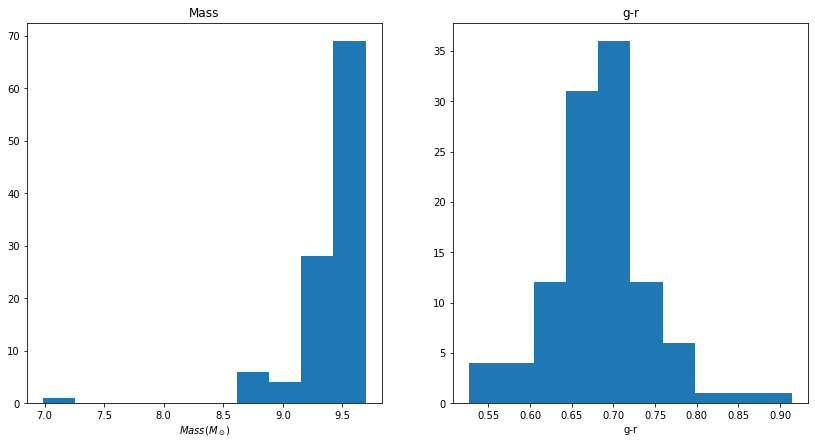

In [11]:
MASS = []
absmag_g_r = []

for plateifu in quenched_AGN:
    maps = Maps(plateifu=plateifu, mode='local')
    MASS.append( maps.nsa['elpetro_mass'])
    g = maps.nsa['elpetro_absmag'][3]
    r = maps.nsa['elpetro_absmag'][4] 
    absmag_g_r.append( g-r )

plt.figure( figsize=(14,7))
plt.subplot(1,2,1)
plt.title('Mass')
plt.xlabel(r'$Mass (M_\odot)$')
plt.hist(np.log10(MASS))
print(np.mean(np.log10(MASS)))
print(np.std(np.log10(MASS)))

plt.subplot(1,2,2)
plt.title('g-r')
plt.xlabel('g-r')
plt.hist( absmag_g_r) 
plt.savefig('mass_color.pdf', dpi=600)

In [12]:
# MASS = []

# for plateifu in plateifus:
#     maps = Maps(plateifu=plateifu, mode='local')
#     MASS.append( maps.nsa['elpetro_mass'])


108
108


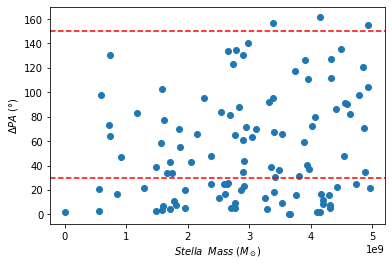

In [17]:
print(len(MASS))
print(len(quenched_PA))
for i in range(0, len(quenched_PA)):
    if quenched_PA[i] < 0:
        quenched_PA[i] = np.abs(quenched_PA[i])

plt.axhline(y=150, c='r', linestyle='--')
plt.axhline(y=30, c='r', linestyle='--')
plt.xlabel(r'$Stella \;\; Mass \; (M_\odot)$')
plt.ylabel(r'$\Delta PA \; (\degree)$')
plt.scatter(MASS, quenched_PA)
plt.savefig('mass_delta.pdf',dpi=600)

In [6]:
print(maps.nsa)

{'iauname': 'J165735.33+391709.8', 'field': 47, 'run': 2335, 'camcol': 6, 'version': 'v1_0_1', 'nsaid': 101751, 'nsaid_v1b': -999, 'z': 0.0333471, 'zdist': 0.033867, 'sersic_absmag': [-14.3088, -14.7956, -16.2635, -17.4741, -18.0583, -18.3437, -18.4906], 'elpetro_absmag': [-14.1814, -14.673, -15.7786, -17.5022, -18.0932, -18.3457, -18.4846], 'elpetro_amivar': [133.515, 342.821, 24.5451, 961.626, 1915.35, 1785.45, 52.0251], 'sersic_mass': 1823230000.0, 'elpetro_mass': 1774860000.0, 'elpetro_ba': 0.789678, 'elpetro_phi': 140.968, 'extinction': [0.140456, 0.138592, 0.0873402, 0.0642641, 0.0466097, 0.0353427, 0.0250584], 'elpetro_th50_r': 4.11911, 'petro_th50': 3.64729, 'petro_flux': [3.47097, 5.417, 17.3381, 84.5048, 144.559, 205.398, 193.996], 'petro_flux_ivar': [15.2499, 29.1774, 0.134848, 0.24867, 0.415699, 0.175524, 0.00249867], 'elpetro_flux': [3.84243, 5.97191, 15.091, 83.7138, 146.183, 198.61, 229.039], 'elpetro_flux_ivar': [13.5562, 25.0984, 0.135357, 0.262869, 0.451805, 0.186681,